In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Review on Bitcoin/USDT (6 Feb, 2024)

We are going to use BTC/USDT data from the Feb 06, 2024 data in this notebook. Each record shows a transaction in which a person wants to sell with `best_ask_price` and get a deal with `best_bid_price`.
The same goes for the quantity, seller wants to sell `best_ask_qty` but buyer only buys `best_bid_qty`.

In [15]:
df = pd.read_csv('BTCUSDT-bookTicker-2024-02-06.csv')

In [3]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,1707177600000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,1707235233178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,1707177600000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,1707235233178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,1707177600000,1707177600004


In [42]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], unit='ms')

In [5]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004


In [43]:
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [7]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004


Group by hour to see the number of transactions in each hour

In [8]:
grouped = df.groupby([df['transaction_time'].dt.hour])

In [9]:
grouped['update_id'].count()

transaction_time
0      883747
1      955074
2     1165062
3      867975
4      849887
5      814240
6      829777
7      809152
8     1451969
9     1123615
10    1620430
11    1307003
12    1283219
13    1412374
14    1482887
15    1855624
16    1921017
17    1283150
18    1077940
19    1015262
20    1160909
21     894236
22     663772
23     811752
Name: update_id, dtype: int64

### Clustering using KMeans

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Find the best `k` for clustering based on the distribution score (which is based on coherence).
To have the required accuracy, we _normalize_ the columns into another data frame named `df_bid_ask` that we are going to use in KMeans.

In [11]:
df_bid_ask = df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']]
df_bid_ask=(df_bid_ask-df_bid_ask.mean())/df_bid_ask.std()

In [12]:
df_bid_ask

,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty
0,-1.397036,-0.947282,-1.397062,-0.123554
1,1.415551,-0.903175,1.416043,0.621299
2,-1.397036,-0.947793,-1.397062,-0.123554
3,1.415551,-0.903175,1.416043,0.658433
4,-1.397036,-0.951539,-1.397062,-0.123554
...,...,...,...,...
27540068,1.416072,-1.035666,1.416043,0.171003
27540069,1.416072,-1.035666,1.416043,0.359018
27540070,1.416072,-1.035666,1.416043,0.463680
27540071,1.416072,-1.035666,1.416043,0.519301


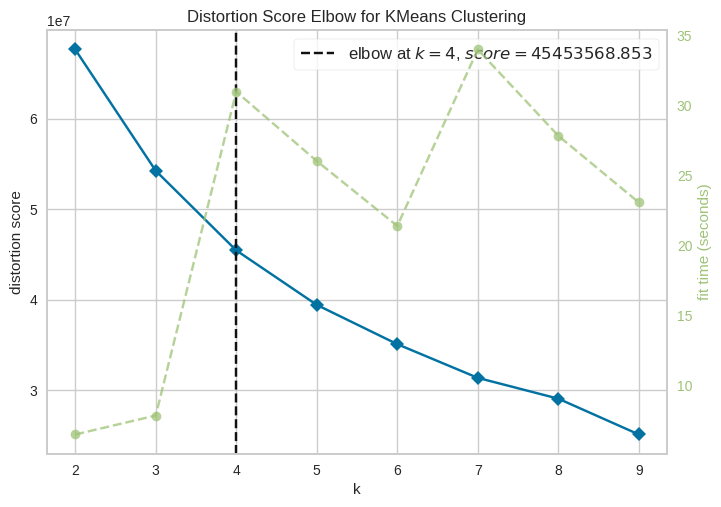

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans = KMeans(random_state=42, n_init="auto")
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(df_bid_ask)
visualizer.show()

In [14]:
kmeans = KMeans(n_clusters=4).fit(df_bid_ask)

In [15]:
kmeans.cluster_centers_

array([[-0.85335626,  0.55124932, -0.85334803, -0.5775607 ],
       [ 0.89587422,  0.85181281,  0.89586052, -0.6594379 ],
       [-0.78917   , -0.64303571, -0.78918221,  0.83451997],
       [ 0.95312511, -0.6202906 ,  0.95313647,  0.3495794 ]])

### Review on the total bid

Provide total best bid by multiplying price into quantity.

In [16]:
df['best_bid_total'] = df['best_bid_price'] * df['best_bid_qty']

We are going to see the distribution of the total best bid over time.

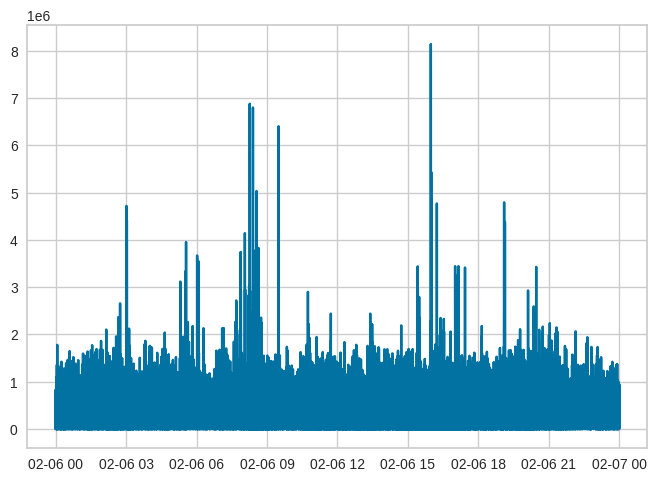

In [17]:
df_group_by_timestamp = df.groupby('transaction_time').mean().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])

The mean distribution contains peaks which we need to investigate more and see why they are happing?

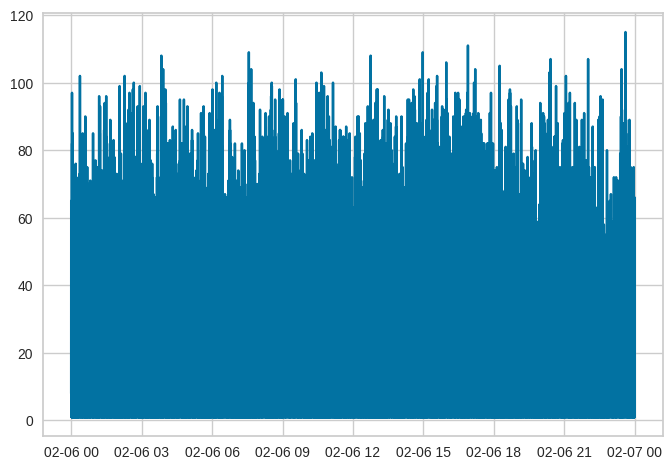

In [18]:
df_group_by_timestamp = df.groupby('transaction_time').count().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])

The count distribution, unlike the mean, doesn't contain any peak which shows these peak shouldn't happen because of low number of transactions.

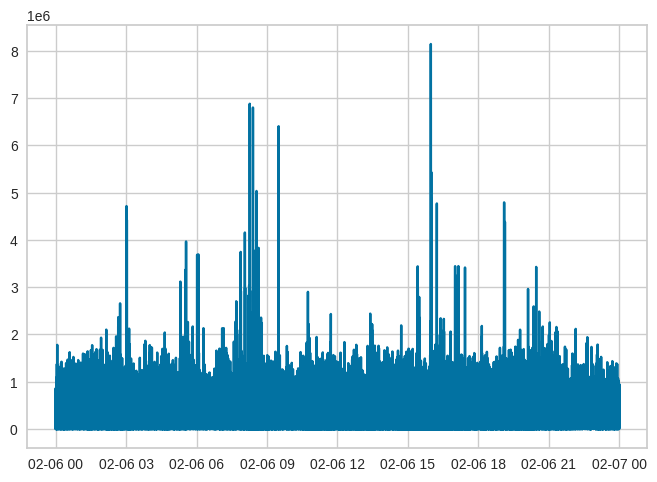

In [19]:
df_group_by_timestamp = df.groupby('transaction_time').median().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])

Create another Data frame for the outliers based on their total bid.

Based on the above diagrams, it seems we have some transaction which is not normal in our context. I am going to use histogram and see the distribution of the transactions value.

(array([2.6822833e+07, 6.6013500e+05, 3.9205000e+04, 1.1214000e+04,
        2.3860000e+03, 3.3190000e+03, 3.5000000e+01, 8.5800000e+02,
        3.5000000e+01, 5.3000000e+01]),
 array([4.25649000e+01, 8.19934674e+05, 1.63982678e+06, 2.45971889e+06,
        3.27961100e+06, 4.09950311e+06, 4.91939522e+06, 5.73928733e+06,
        6.55917944e+06, 7.37907155e+06, 8.19896366e+06]),
 <BarContainer object of 10 artists>)

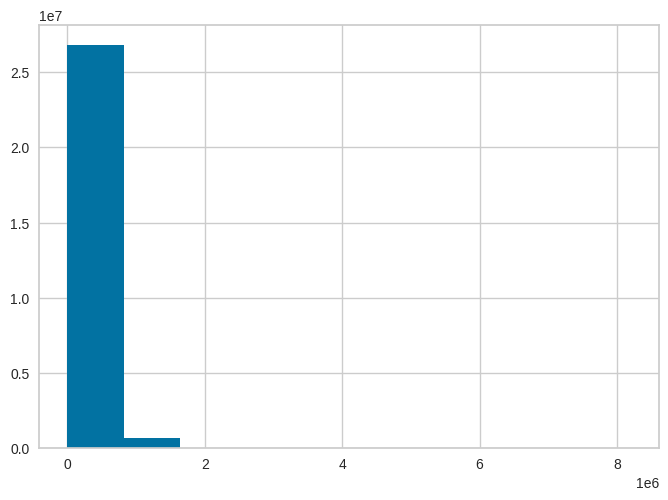

In [20]:
counts, bins = np.histogram(df['best_bid_total'])

plt.hist(bins[:-1], bins, weights=counts)

In [21]:
bins, counts

(array([4.25649000e+01, 8.19934674e+05, 1.63982678e+06, 2.45971889e+06,
        3.27961100e+06, 4.09950311e+06, 4.91939522e+06, 5.73928733e+06,
        6.55917944e+06, 7.37907155e+06, 8.19896366e+06]),
 array([26822833,   660135,    39205,    11214,     2386,     3319,
              35,      858,       35,       53]))

### Clustering visualization

Based on the histogram and plots we draw based on the `best_bid_total`,
it seems we have some actual outlier which we need to investigate. Let use KMeans and see its clustering with these outliers. For visualization of the clustering, we can also use **LDA**.

In [22]:
labels = kmeans.predict(df_bid_ask)

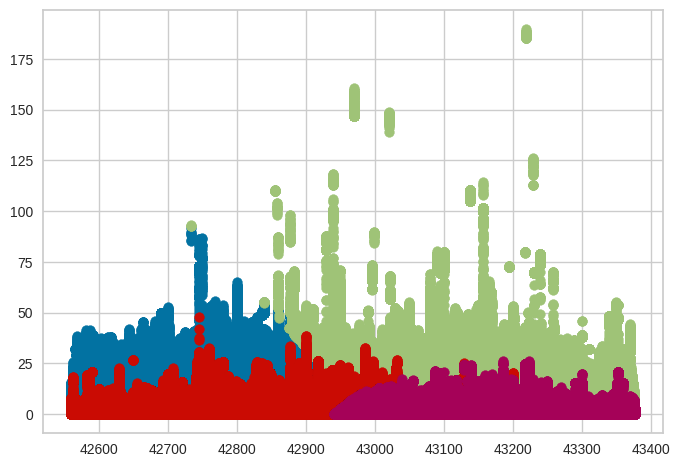

In [23]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
for i in u_labels:
    plt.scatter(df[labels == i]['best_bid_price'] , df[labels == i]['best_bid_qty'] , label = i)

It seems data is clustered using price, which is predictable because the only feature we have is price.

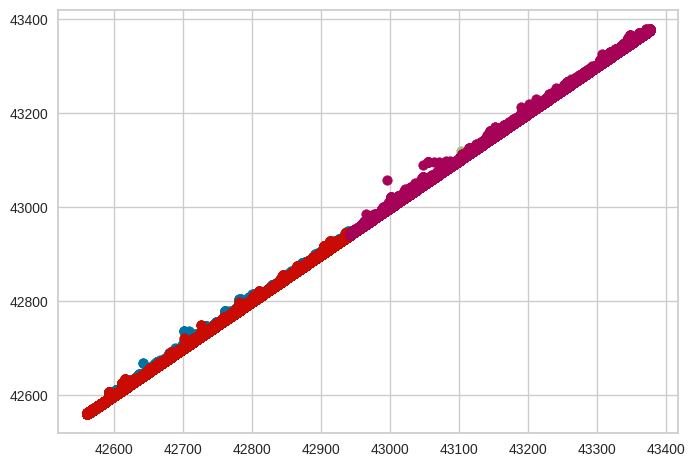

In [24]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
for i in u_labels:
    plt.scatter(df[labels == i]['best_bid_price'] , df[labels == i]['best_ask_price'] , label = i)

### Market Spread

Based on the clustering we figured out that `best_bid_price` and `best_ask_price` are always similar, so we went for another metrics `best_spread_price` and `best_spread_qty` which is the difference between `bid` and `ask` prices and show the market status. We have different type of order books, we need to know which one here we have.

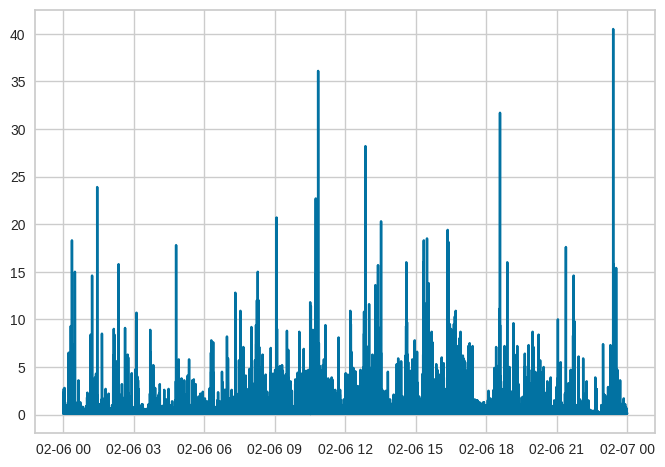

In [25]:
df['best_spread_price'] = df['best_ask_price'] - df['best_bid_price']

df_group_by_timestamp = df.groupby('transaction_time').median().reset_index()

plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_spread_price'])

These are the records in which the buyer bought the coins with more than $30 discount to the seller price.

In [26]:
df[df['best_spread_price'] > 30]

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time,best_bid_total,best_spread_price
7601697,3940242734839,42995.7,0.880,43057.6,0.358,2024-02-06 18:35:25.594,2024-02-06 18:35:25.660,37836.2160,61.9
16581837,3941044224776,43063.7,3.145,43095.3,2.000,2024-02-06 23:24:35.430,2024-02-06 23:24:35.448,135435.3365,31.6
16581841,3941044226254,43054.8,1.395,43095.3,2.000,2024-02-06 23:24:35.432,2024-02-06 23:24:35.450,60061.4460,40.5
16581843,3941044226308,43054.8,1.395,43095.3,2.461,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5
16581845,3941044226310,43054.8,1.395,43095.3,2.922,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5
16581847,3941044226312,43054.8,1.395,43095.3,4.122,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5
16581849,3941044226315,43054.8,1.395,43095.3,5.322,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5
16581851,3941044226334,43054.8,1.395,43095.3,6.522,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5
16581853,3941044226335,43054.8,1.395,43095.3,7.722,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5
16581855,3941044226336,43054.8,1.395,43095.3,8.183,2024-02-06 23:24:35.432,2024-02-06 23:24:35.451,60061.4460,40.5


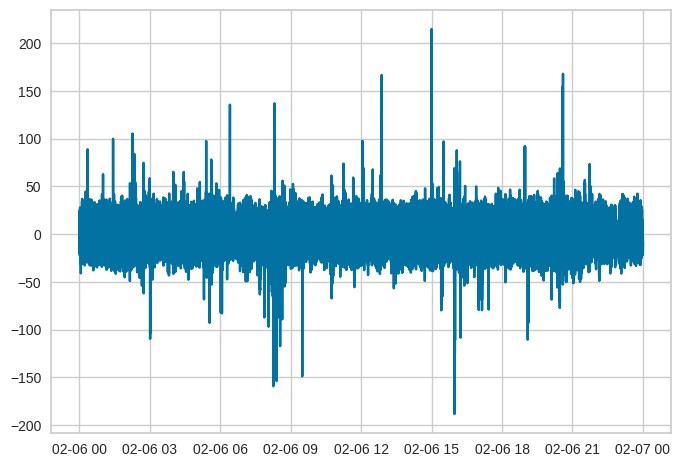

In [27]:
df['best_spread_qty'] = df['best_ask_qty'] - df['best_bid_qty']

df_group_by_timestamp = df.groupby('transaction_time').median().reset_index()

plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_spread_qty'])

There are records in which seller wants to sell less than 1 coin but buyer, buys around 100 coins! Which is insane.

In [28]:
df[df['best_spread_qty'] < -100]

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time,best_bid_total,best_spread_price,best_spread_qty
828549,3939772024078,43138.7,105.875,43138.8,1.128,2024-02-06 16:13:52.018,2024-02-06 16:13:52.037,4.567310e+06,0.1,-104.747
828551,3939772024092,43138.7,105.875,43138.8,1.321,2024-02-06 16:13:52.018,2024-02-06 16:13:52.037,4.567310e+06,0.1,-104.554
828553,3939772024265,43138.7,105.875,43138.8,1.387,2024-02-06 16:13:52.018,2024-02-06 16:13:52.037,4.567310e+06,0.1,-104.488
828555,3939772024679,43138.7,105.875,43138.8,2.587,2024-02-06 16:13:52.020,2024-02-06 16:13:52.048,4.567310e+06,0.1,-103.288
828557,3939772024694,43138.7,105.875,43138.8,2.582,2024-02-06 16:13:52.020,2024-02-06 16:13:52.048,4.567310e+06,0.1,-103.293
...,...,...,...,...,...,...,...,...,...,...
27521543,3939714244162,43230.0,112.668,43231.7,1.800,2024-02-06 15:59:53.758,2024-02-06 15:59:53.767,4.870638e+06,1.7,-110.868
27521544,3939714244262,43230.0,112.668,43231.7,2.700,2024-02-06 15:59:53.760,2024-02-06 15:59:53.767,4.870638e+06,1.7,-109.968
27521545,3939714244263,43230.0,112.668,43231.7,3.600,2024-02-06 15:59:53.760,2024-02-06 15:59:53.767,4.870638e+06,1.7,-109.068
27521546,3939714244264,43230.0,112.668,43231.7,3.950,2024-02-06 15:59:53.760,2024-02-06 15:59:53.767,4.870638e+06,1.7,-108.718


In the following diagram, we use the KMeans clustering algorithm that we trained before and visualize it based on the `spread` parameters.

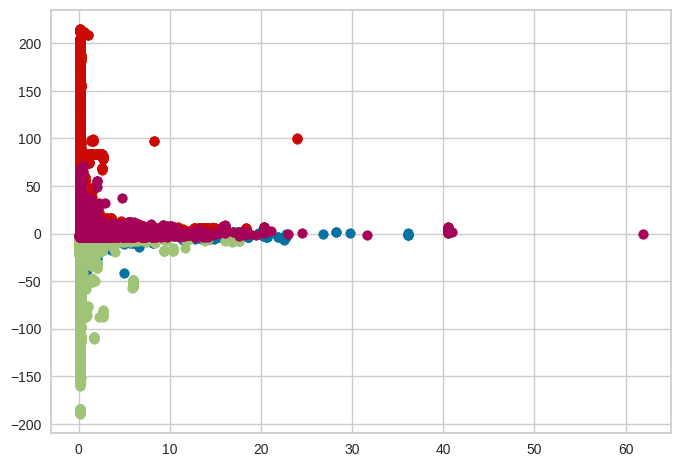

In [30]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)
 
for i in u_labels:
    plt.scatter(df[labels == i]['best_spread_price'] , df[labels == i]['best_spread_qty'] , label = i)

The above diagram shows that our current clustering is not good enough. I am going to train it again using our new `spread` columns. Besides that it shows people change the amount in the lower prices.

### Relation between outliers and spread

In [29]:
df_outliers = df_group_by_timestamp[df_group_by_timestamp['best_bid_total'] > 2e6]
df_outliers

,transaction_time,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,event_time,best_bid_total,best_spread_price,best_spread_qty
554877,2024-02-06 02:09:18.313,3.937022e+12,42752.2,49.173,42752.30,0.114,2024-02-06 02:09:18.320999936,2.102254e+06,0.1,-49.059
719561,2024-02-06 02:39:48.026,3.937121e+12,42836.6,48.649,42836.70,5.228,2024-02-06 02:39:48.032000000,2.083958e+06,0.1,-43.421
719562,2024-02-06 02:39:48.028,3.937121e+12,42836.6,48.649,42836.70,4.993,2024-02-06 02:39:48.035000064,2.083958e+06,0.1,-43.656
719563,2024-02-06 02:39:48.029,3.937121e+12,42836.6,48.700,42836.70,4.591,2024-02-06 02:39:48.035000064,2.086142e+06,0.1,-44.109
719564,2024-02-06 02:39:48.030,3.937121e+12,42836.6,48.835,42836.70,3.404,2024-02-06 02:39:48.035000064,2.091925e+06,0.1,-45.431
...,...,...,...,...,...,...,...,...,...,...
7146403,2024-02-06 22:08:37.501,3.940873e+12,43134.8,47.902,43134.90,2.510,2024-02-06 22:08:37.504999936,2.066243e+06,0.1,-45.392
7146404,2024-02-06 22:08:37.503,3.940873e+12,43134.8,47.902,43134.90,1.880,2024-02-06 22:08:37.510000128,2.066243e+06,0.1,-46.022
7146405,2024-02-06 22:08:37.504,3.940873e+12,43134.8,47.902,43134.90,0.680,2024-02-06 22:08:37.511000064,2.066243e+06,0.1,-47.222
7146406,2024-02-06 22:08:37.505,3.940873e+12,43134.8,47.902,43134.90,0.030,2024-02-06 22:08:37.512000000,2.066243e+06,0.1,-47.872


In [31]:
kmeans = KMeans(n_clusters=6).fit(df[['best_spread_price', 'best_spread_qty']])
labels = kmeans.predict(df[['best_spread_price', 'best_spread_qty']])

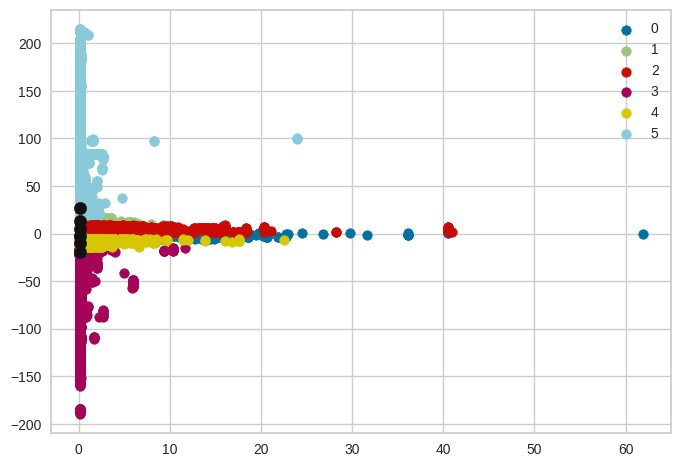

In [32]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

for i in u_labels:
    plt.scatter(df[labels == i]['best_spread_price'] , df[labels == i]['best_spread_qty'] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()

In [33]:
np.histogram(kmeans.predict(df_outliers[['best_spread_price', 'best_spread_qty']]))

(array([8697,    0,    0,    0,    0,    0,    0,    0,    0,    3]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]))

Almost all the outliers lives in the label '3' which makes sense, because all of them buying more than what seller wants to sale.

The new clustering makes more sense because it divides people based on the amount they buy in a transaction, not the price.

## Review on ADA/USDT (6 Feb, 2024)

In [63]:
df_ada = pd.read_csv('ADAUSDT-bookTicker-2024-02-06.csv')
df_ada['transaction_time'] = pd.to_datetime(df_ada['transaction_time'], unit='ms')
df_ada['event_time'] = pd.to_datetime(df_ada['event_time'], unit='ms')

In [64]:
df_ada['best_spread_price'] = df_ada['best_ask_price'] - df_ada['best_bid_price']
df_ada['best_spread_qty'] = df_ada['best_ask_qty'] - df_ada['best_bid_qty']

In [65]:
df_ada.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time,best_spread_price,best_spread_qty
0,3936653545239,0.494,11682.0,0.4941,53389.0,2024-02-06 00:00:00.013,2024-02-06 00:00:00.019,0.0001,41707.0
1,3936655745840,0.494,11682.0,0.4941,53591.0,2024-02-06 00:00:02.927,2024-02-06 00:00:04.121,0.0001,41909.0
2,3936655746569,0.494,11682.0,0.4941,51240.0,2024-02-06 00:00:02.929,2024-02-06 00:00:04.123,0.0001,39558.0
3,3936655747178,0.494,11479.0,0.4941,51240.0,2024-02-06 00:00:02.930,2024-02-06 00:00:04.126,0.0001,39761.0
4,3936655747423,0.494,11479.0,0.4941,50970.0,2024-02-06 00:00:02.931,2024-02-06 00:00:04.126,0.0001,39491.0


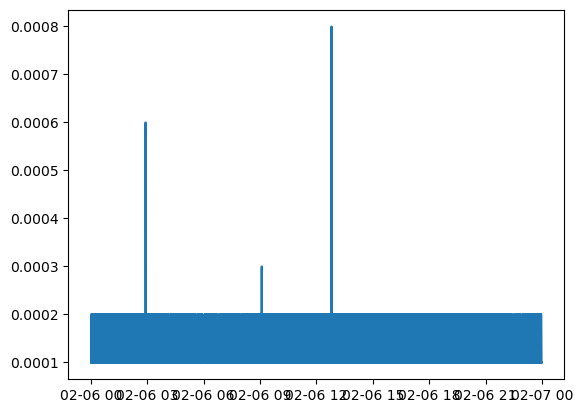

In [66]:
df_ada_group_by_timestamp = df_ada.groupby('transaction_time').median().reset_index()
plt.plot(df_ada_group_by_timestamp['transaction_time'], df_ada_group_by_timestamp['best_spread_price'])

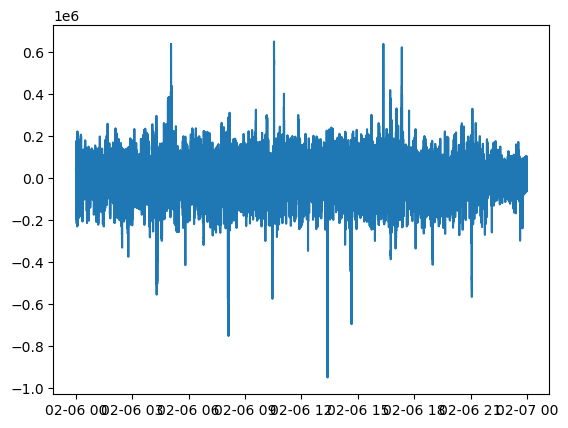

In [67]:
plt.plot(df_ada_group_by_timestamp['transaction_time'], df_ada_group_by_timestamp['best_spread_qty'])

## Review on FET/USDT (6 Feb, 2024)

In [4]:
df_fet = pd.read_csv('FETUSDT-bookTicker-2024-02-06.csv')
df_fet['transaction_time'] = pd.to_datetime(df_fet['transaction_time'], unit='ms')
df_fet['event_time'] = pd.to_datetime(df_fet['event_time'], unit='ms')

In [8]:
df_fet['best_spread_price'] = df_fet['best_ask_price'] - df_fet['best_bid_price']
df_fet['best_spread_qty'] = df_fet['best_ask_qty'] - df_fet['best_bid_qty']

In [9]:
df_fet.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time,best_spread_price,best_spread_qty
0,3936653544361,0.5273,3452.0,0.5274,1779.0,2024-02-06 00:00:00.007,2024-02-06 00:00:00.013,0.0001,-1673.0
1,3936655751343,0.5273,3452.0,0.5274,1591.0,2024-02-06 00:00:02.941,2024-02-06 00:00:04.133,0.0001,-1861.0
2,3936655751347,0.5273,3452.0,0.5274,1402.0,2024-02-06 00:00:02.941,2024-02-06 00:00:04.133,0.0001,-2050.0
3,3936655752686,0.5273,3452.0,0.5274,1806.0,2024-02-06 00:00:02.944,2024-02-06 00:00:04.135,0.0001,-1646.0
4,3936655777990,0.5273,3452.0,0.5274,1995.0,2024-02-06 00:00:02.995,2024-02-06 00:00:04.183,0.0001,-1457.0


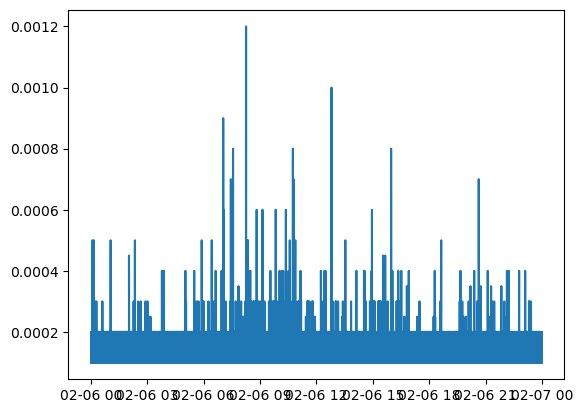

In [11]:
df_fet_group_by_timestamp = df_fet.groupby('transaction_time').median().reset_index()
plt.plot(df_fet_group_by_timestamp['transaction_time'], df_fet_group_by_timestamp['best_spread_price'])

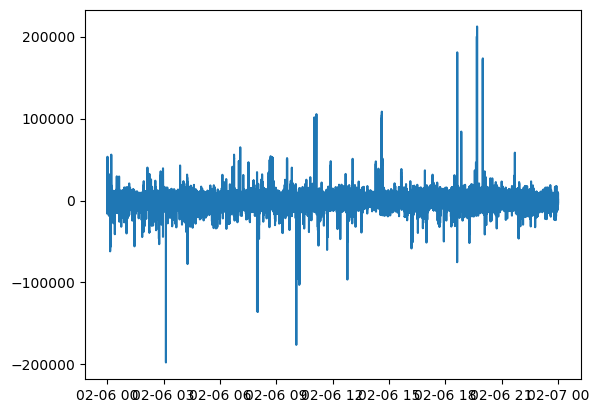

In [12]:
plt.plot(df_fet_group_by_timestamp['transaction_time'], df_fet_group_by_timestamp['best_spread_qty'])

## Relation between FET/USDT and BTC/USDT

In [20]:
fet_and_btc = pd.DataFrame()
fet_and_btc['btc'] = (df.sort_values('transaction_time'))['best_bid_price']
fet_and_btc['fet'] = (df_fet.sort_values('transaction_time'))['best_bid_price']

In [21]:
fet_and_btc.corr()

,btc,fet
btc,1.000000,-0.016587
fet,-0.016587,1.000000


In [45]:
df['total_bid_price'] = df['best_bid_price'] * df['best_bid_qty']
df_fet['total_bid_price'] = df_fet['best_bid_price'] * df_fet['best_bid_qty']

df['best_bid_price_normal'] = (df['best_bid_price'] - df['best_bid_price'].min()) / (df['best_bid_price'].max() - df['best_bid_price'].min())
df_fet['best_bid_price_normal'] = (df_fet['best_bid_price'] - df_fet['best_bid_price'].min()) / (df_fet['best_bid_price'].max() - df_fet['best_bid_price'].min())

df_group_by_timestamp = df.groupby('transaction_time').median().reset_index()
df_fet_group_by_timestamp = df_fet.groupby('transaction_time').median().reset_index()

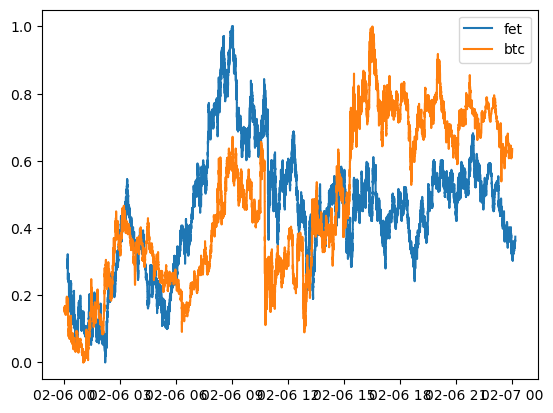

In [48]:
plt.plot(df_fet_group_by_timestamp['transaction_time'] + pd.Timedelta(minutes=10), df_fet_group_by_timestamp['best_bid_price_normal'], label='fet')
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_price_normal'], label='btc')
plt.legend()
plt.show()

In [62]:
df_fet_group_by_timestamp['transaction_time_shifted'] = df_fet_group_by_timestamp['transaction_time'] - pd.Timedelta(minutes=6)
fet_and_btc = pd.DataFrame()
fet_and_btc['btc'] = (df_group_by_timestamp.set_index('transaction_time'))['best_bid_price']
fet_and_btc['fet'] = (df_fet_group_by_timestamp.set_index('transaction_time_shifted'))['best_bid_price']
fet_and_btc.dropna().corr()

,btc,fet
btc,1.000000,0.396047
fet,0.396047,1.000000


## Relation between ADA/USDT and BTC/USDT

In [68]:
ada_and_btc = pd.DataFrame()
ada_and_btc['btc'] = (df.sort_values('transaction_time'))['best_bid_price']
ada_and_btc['ada'] = (df_ada.sort_values('transaction_time'))['best_bid_price']

In [69]:
ada_and_btc.corr()

,btc,ada
btc,1.000000,0.033049
ada,0.033049,1.000000


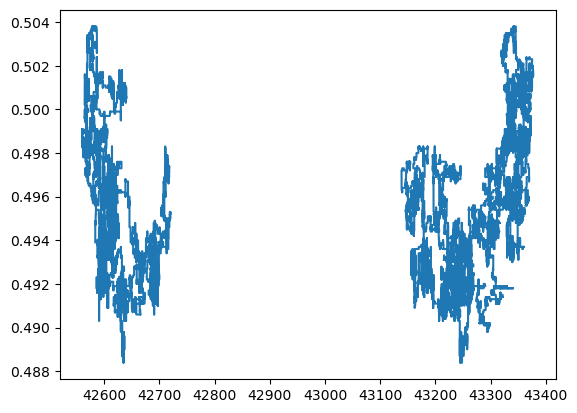

In [70]:
plt.plot(ada_and_btc['btc'], ada_and_btc['ada'])

In [71]:
ada_and_btc['ada']

0           0.494
2           0.494
4           0.494
6           0.494
8           0.494
            ...  
17624105      NaN
17624107      NaN
17624109      NaN
17624111      NaN
17624113      NaN
Name: ada, Length: 27540073, dtype: float64

In [72]:
ada_and_btc['btc']

0           42692.9
2           42692.9
4           42692.9
6           42692.9
8           42692.9
             ...   
17624105    43079.1
17624107    43079.1
17624109    43079.1
17624111    43079.1
17624113    43079.1
Name: btc, Length: 27540073, dtype: float64

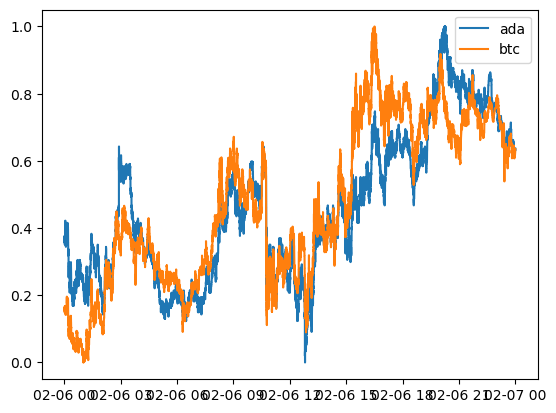

In [73]:
df['total_bid_price'] = df['best_bid_price'] * df['best_bid_qty']
df_ada['total_bid_price'] = df_ada['best_bid_price'] * df_ada['best_bid_qty']

df['best_bid_price_normal'] = (df['best_bid_price'] - df['best_bid_price'].min()) / (df['best_bid_price'].max() - df['best_bid_price'].min())
df_ada['best_bid_price_normal'] = (df_ada['best_bid_price'] - df_ada['best_bid_price'].min()) / (df_ada['best_bid_price'].max() - df_ada['best_bid_price'].min())

df_group_by_timestamp = df.groupby('transaction_time').median().reset_index()
df_ada_group_by_timestamp = df_ada.groupby('transaction_time').median().reset_index()

plt.plot(df_ada_group_by_timestamp['transaction_time'], df_ada_group_by_timestamp['best_bid_price_normal'], label='ada')
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_price_normal'], label='btc')
plt.legend()
plt.show()

Here we calculate the correlation between these two coins and shifter

In [101]:
df_ada_group_by_timestamp['transaction_time_shifted'] = df_ada_group_by_timestamp['transaction_time'] - pd.Timedelta(seconds=30)

ada_and_btc = pd.DataFrame()
ada_and_btc['btc'] = (df_group_by_timestamp.set_index('transaction_time'))['best_bid_price']
ada_and_btc['ada'] = (df_ada_group_by_timestamp.set_index('transaction_time_shifted'))['best_bid_price']
ada_and_btc.dropna().corr()

,btc,ada
btc,1.000000,0.856863
ada,0.856863,1.000000


In [46]:
df[df['best_bid_price'] == 43000]

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time,best_bid_total,best_spread_price,best_spread_qty,total_bid_price,best_bid_price_normal
7602159,3940242879286,43000.0,2.289,43004.4,0.002,2024-02-06 18:35:25.873,2024-02-06 18:35:26.037,98427.0,4.4,-2.287,98427.0,0.538603
7602161,3940242879328,43000.0,2.286,43004.4,0.002,2024-02-06 18:35:25.873,2024-02-06 18:35:26.037,98298.0,4.4,-2.284,98298.0,0.538603
7602163,3940242879744,43000.0,2.244,43004.4,0.002,2024-02-06 18:35:25.875,2024-02-06 18:35:26.038,96492.0,4.4,-2.242,96492.0,0.538603
7602165,3940242880208,43000.0,2.197,43004.4,0.002,2024-02-06 18:35:25.876,2024-02-06 18:35:26.038,94471.0,4.4,-2.195,94471.0,0.538603
7602167,3940242882371,43000.0,2.197,43005.0,0.383,2024-02-06 18:35:25.881,2024-02-06 18:35:26.041,94471.0,5.0,-1.814,94471.0,0.538603
...,...,...,...,...,...,...,...,...,...,...,...,...
25378495,3939444242990,43000.0,2.541,43000.1,12.326,2024-02-06 14:48:27.028,2024-02-06 14:48:27.040,109263.0,0.1,9.785,109263.0,0.538603
25378496,3939444243237,43000.0,2.551,43000.1,12.326,2024-02-06 14:48:27.031,2024-02-06 14:48:27.050,109693.0,0.1,9.775,109693.0,0.538603
25378497,3939444243296,43000.0,2.561,43000.1,12.326,2024-02-06 14:48:27.032,2024-02-06 14:48:27.050,110123.0,0.1,9.765,110123.0,0.538603
25378498,3939444243323,43000.0,2.571,43000.1,12.326,2024-02-06 14:48:27.033,2024-02-06 14:48:27.050,110553.0,0.1,9.755,110553.0,0.538603


## Time series tests on BTC/USDT

These tests are useful to figuring out about a time series data is stationary or not. Because the data size is huge, I grouped it with minutes (the original data is in milliseconds)

In [47]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf

In [48]:
df_group_by_minute = df.groupby([df['transaction_time'].dt.minute]).mean()

result_adf = adfuller(df_group_by_minute.set_index('transaction_time')['best_bid_price'])
print("ADF Statistic:", result_adf[0])
print("p-value:", result_adf[1])

ADF Statistic: -2.012295539939047
p-value: 0.28120809178908635


In [49]:
result_acf = acf(df_group_by_minute.set_index('transaction_time')['best_bid_price'])

In [50]:
result_acf

array([ 1.        ,  0.84255519,  0.67945038,  0.57426365,  0.49769102,
        0.40361997,  0.30272504,  0.14976438,  0.03845048, -0.02224309,
       -0.03767595, -0.05884931, -0.13908748, -0.21121395, -0.2626583 ,
       -0.27541418, -0.28837595, -0.30356925])

In [51]:
# ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is Stationary:', result[1] <= 0.05)

# ACF Plot
def plot_acf(series, lags=30):
    acf_values = acf(series, nlags=lags)
    plt.stem(range(1, lags + 1), acf_values[1:])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF)')
    plt.show()

# Apply ADF Test
adf_test((df_group_by_minute.set_index('transaction_time')['best_bid_price'] - df_group_by_minute.set_index('transaction_time')['best_bid_price'].shift(1)).dropna())

ADF Statistic: -7.095353371547399
p-value: 4.303534790267943e-10
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Is Stationary: True
